# New model using SKLearn random forest regressor


In [1]:
import numpy as np
import prep_data_2
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from xgboost import XGBClassifier
import pandas as pd

c:\Users\joshc\anaconda3\envs\pytorch\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Define Paths
train_csv_path = "C:/Users/joshc/OneDrive/Documents/01 Trying too hard/Machine Learning and AI/Kaggle/titanic/Datasets/train.csv"
summary_stats_path = "C:/Users/joshc/OneDrive/Documents/01 Trying too hard/Machine Learning and AI/Kaggle/titanic/Datasets/summary stats.txt"
final_test_csv_path = "C:/Users/joshc/OneDrive/Documents/01 Trying too hard/Machine Learning and AI/Kaggle/titanic/Datasets/test.csv"

data_df = prep_data_2.main(train_csv_path=train_csv_path)

y_feature = "Survived"
X_features = ['Age', 'Fare', 'female', 'no friends or family', '10^class']

X = data_df[X_features]
y = data_df[y_feature]

In [3]:
# Define model
model = XGBClassifier()

# Fit model
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=rskf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.817 (0.033)


In [ ]:
# Basic hyperparameter tuning
models = []
n_scores = []

max_depth_values = range(1,10)
n_estimators = [10, 50, 100, 500, 1000, 5000]

for depth in max_depth_values:
    for n in n_estimators:
        xgb_model = XGBClassifier(max_depth=depth, n_estimators=n)
        models.append(xgb_model)

for model in models:
    mean_score = np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=rskf, n_jobs=-1))
    n_scores.append({
        "mean_score": mean_score,
        "max_depth": model.max_depth,
        "n_estimators": model.n_estimators
        })
    print(f"Finished model: max_depth = {model.max_depth}, n_estimators = {model.n_estimators}")

results_df = pd.DataFrame(n_scores, columns=n_scores[0].keys())   
results_df

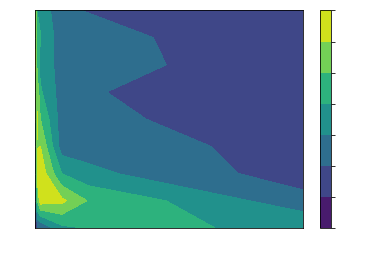

In [7]:
import matplotlib.pyplot as plt

xs = np.array(results_df["max_depth"])
ys = np.array(results_df["n_estimators"])
zs = np.array(results_df["mean_score"])

shape = (len(np.unique(xs)), len(np.unique(ys)))

x_cont, y_cont = np.meshgrid(np.unique(ys), np.unique(xs))
z_cont = np.reshape(zs, shape)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(x_cont, y_cont, z_cont)
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='both', colors='white')

color_bar = plt.colorbar()
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')                
plt.setp(cbytick_obj, color='w')

plt.show()